# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# load each of these files
df_census = pd.read_csv(adultDataSet_filename)
df_bnb = pd.read_csv(airbnbDataSet_filename)
df_whr = pd.read_csv(WHRDataSet_filename)
df_reviews = pd.read_csv(bookReviewDataSet_filename)

In [3]:
# display first 5 rows in each
display(df_census.head())
display(df_bnb.head())
display(df_whr.head())
display(df_reviews.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


**Project Idea**

Considering that I would love to explore Natural Language Processing further and we have performed a sentiment analysis pipeline for this dataset in the last lab, the ML problem that I am interested in is applying a similar approach (even with multiclass sentiments) for a new, external dataset. We can test both more basic models (e.g. logisitic regression) and neural networks!


**Import IMDB Movie Reviews Dataset from Kaggle**

Note: To connect with my kaggle acount, I've added the kaggle.json file to our directory

In [2]:
! pwd

/home/codio/workspace


In [3]:
# make sure kaggle.json is in here
! ls

 ChooseYourProblemAndData.ipynb		 ImplementMLProjectPlan-copy.ipynb
 data					 ImplementMLProjectPlan.ipynb
 DefineAndSolveMLProblem.ipynb		 kaggle.json
 gradebook.db				 __pycache__
'IMDB Dataset.csv'			 startup.sh
 imdb-dataset-of-50k-movie-reviews.zip


In [27]:
# troubleshooting, ensure kaggle is in PATH so we can run it in CLI
import os
os.environ['PATH'] += ':/home/codio/.local/bin'

In [26]:
! mkdir ~/.kaggle

In [28]:
! cp kaggle.json ~/.kaggle/

In [29]:
! chmod 600 ~/.kaggle/kaggle.json

In [32]:
! kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 74%|████████████████████████████▊          | 19.0M/25.7M [00:00<00:00, 154MB/s]
100%|███████████████████████████████████████| 25.7M/25.7M [00:00<00:00, 148MB/s]


In [33]:
! unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


Note: The CLI lines above only have to be run ONCE, once the dataset is loaded into the local directory it can just be read through pandas.

In [4]:
# load csv as a pandas dataframe
df_imdb = pd.read_csv('IMDB Dataset.csv')

In [5]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**Formulating ML Problem**
1. I have decided to utilize an external dataset, IMDB Movie Reviews (very similar to book reviews), which contain sentiment labels
2. I will be predicting whether a certain movie review is positive or negative sentiment. In this case, the sentiment is the label. I will also attempt to apply topic modeling using gensim and LDA / LSA to see overarching themes among the reviews.
3. This is a supervised learning problem, namely binary classification. The topic modeling portion which I want to explore is an unsupervised NLP task.
4. Our features will constitute of the respective vectors or embeddings we create for our pre-processed text data / tokens, which could constitute of word frequencies, tf-idf measures for words, or word embeddings. This is subjective on the NLP vectorization technique we will be using for this problem.
5. This is an important problem because in the world of Big Data and an incredible amount of text being available on the internet, being able to classify a movie review as positive or negative at a mass scale using an accurate machine learning project can be super important to gain an overview of overall sentiment. Additionally, it opens the doors for further analysis of those classified as positive or negative respectively with things like Topic Modeling / Fine Tuning LLMs, etc...

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [6]:
# print first 10 rows
df_imdb.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [7]:
# look at size of dataset
df_imdb.shape # there are 50k total reviews

(50000, 2)

In [8]:
# print number of positive and negative reviews
df_imdb['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

**Due to large dataset size, we will only pull a sample of 2000 positive and 2000 negative reviews**

In [9]:
pos_reviews = df_imdb[df_imdb['sentiment'] == 'positive'].sample(n=2000, random_state=42)
neg_reviews = df_imdb[df_imdb['sentiment'] == 'negative'].sample(n=2000, random_state=42)

In [10]:
df_sample = pd.concat([pos_reviews, neg_reviews]).sample(frac=1, random_state=42).reset_index(drop=True) # combine, shuffle

In [11]:
df_sample.head() # print out first 5 rows

,review,sentiment
0,There is so much of worth in this movie that i...,positive
1,This is a terrible movie that only gets worse ...,negative
2,If you've been looking for a film where a out ...,positive
3,Quite what the producers of this appalling ada...,negative
4,I am not sure who is writing these<br /><br />...,negative


In [12]:
df_sample['sentiment'].value_counts() # check updated value counts

positive    2000
negative    2000
Name: sentiment, dtype: int64

In [13]:
# print example of positive and negative review
print('Positive Review: \n\n', df_sample.loc[0, 'review'])
print()
print('Negative Review: \n\n', df_sample.loc[3, 'review'])

Positive Review: 

 There is so much of worth in this movie that it is hard to know where to begin with praise. Let me begin by expressing my admiration for a perfect portrayal by Reese Witherspoon. That her performance stands out in the excellent cast is praise indeed. Robert Mulligan has seldom disappointed those of us who have admired his work. Every frame of The Man in the Moon is evidence of film making at its best.

Negative Review: 

 Quite what the producers of this appalling adaptation were trying to do is impossible to fathom.<br /><br />A group of top quality actors, in the main well cast (with a couple of notable exceptions), who give pretty good performances. Penelope Keith is perfect as Aunt Louise and equally good is Joanna Lumley as Diana. All do well with the scripts they were given.<br /><br />So much for the good. The average would include the sets. Nancherrow is nothing like the house described in the book, although bizarrely the house they use for the Dower House l

**It looks like some reviews might contain some html tags, punctuation, and unnecessary words that would have to be filtered out in the preprocessing step. We would also have to split each review into smaller segments (e.g. words or n-grams) through tokenization since many vary in length.**

Strategies for Data Preparation and Modeling:
- We will have to apply some NLP preprocessing techniques like removing punctuation and stop words, as well as tokenization, lowercasing, lemmatization, and finally vectorization. We can use gensim or the NLTK libraries for this.
- Some models to consider are Logistic Regression and a Feed-Forward Neural Net.
- To evaluate our model's performance, we can use accuracy and an AUC-ROC curve or potentially a confusion matrix!

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, our feature list (after NLP preprocessing steps) will contain tfidf scores for each word in our vocabulary (tfidf vectorizer). However, if this doesn't result in optimal performance for our model, we will try embedding our words using Word2Vec to capture more semantic meaning.
2. The different data preparation techniques we will be using will be common to an NLP pipeline. We will be lowercasing all of the words, removing punctuation, stop words, and html tags, as well as also performing lemmatization and tokenization (to get sentences / paragraphs into a list of words). We will be using gensim and NLTK libraries for these tasks.
3. The models we will be using for sentiment classification are Logisitic Regression and a Keras Neural Network. For topic modeling (if doing), we will leverage some commonly used models like Latent Dirichlet Analysis (LDA) and Latent Semantic Analysis (LSA).
4. Our plan will be to first split our dataset into training, validation, and test. We can then transform each set using tfidf vectorization and fit the models on our tfidf matrix. We can then evaluate the performances accuracies of the model (both Logistic Regression / NN) using both training and test and tweak hyperparameters, especially for our neural network. Lastly, with optimal parameters set, we will test our model on our test set.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [17]:
# YOUR CODE HERE
# for data cleaning / pre-processing
import gensim
import nltk
import string
import re # regular expression
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# for binary classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score
import tensorflow.keras as keras

[nltk_data] Downloading package punkt to /home/codio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/codio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/codio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/codio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Preprocessing Our Data and Splitting in Training and Testing

In [18]:
# start by assigning X and y (labels)
X = df_sample['review']
y = df_sample['sentiment']

In [19]:
# encode our labels into binary numbers (0 or 1)
# Create a label encoder instance
le = LabelEncoder()

# Fit and transform the labels
y_encoded = le.fit_transform(y)

print(y_encoded[:10])     
print(le.classes_)

[1 0 1 0 0 1 1 1 1 1]
['negative' 'positive']


1 represents 'positive' whereas 0 represents 'negative'

In [20]:
X.head()

0    There is so much of worth in this movie that i...
1    This is a terrible movie that only gets worse ...
2    If you've been looking for a film where a out ...
3    Quite what the producers of this appalling ada...
4    I am not sure who is writing these<br /><br />...
Name: review, dtype: object

**Create custom function for preprocessing each document / review**

In [21]:
print(X.shape)
print(y_encoded.shape)

(4000,)
(4000,)


In [22]:
# define stopwords, punctuation to remove
stopw = set(stopwords.words('english')) # includes common words in book reviews
punctuation = re.escape(string.punctuation) # originally was using list but this is cleaner and faster

print(punctuation)

\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^_\`\{\|\}\~


In [23]:
# define the lemmatizer from nltk
lemmatizer = WordNetLemmatizer()

In [24]:
# define preprocessing pipeline in method
def preprocess(document):
    # handle empty documents or non-strings (just incase)
    if not isinstance(document, str):
        return ''
    
    # remove any html entities
    document = re.sub(r'<.*?>', '', document)
    # strip any leading or trailing whitespace and lowercase
    document = document.strip().lower()
    document = re.sub(rf'[{punctuation}]', '', document) # remove punctuation using regular expressions
     
    tokens = word_tokenize(document) # tokenize the cleaned document using nltk method so we can easily remove stop words / lemmatize
    tokens = [word for word in tokens if word not in stopw] # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # lemmatize words
    
    cleaned_doc = ' '.join(tokens) # join tokens back together

    return cleaned_doc

In [25]:
# perform preprocessing for one review for testing
test_rev = X[0]
print('Original review:\n', test_rev)
print('Cleaned review:\n', preprocess(test_rev))

Original review:
 There is so much of worth in this movie that it is hard to know where to begin with praise. Let me begin by expressing my admiration for a perfect portrayal by Reese Witherspoon. That her performance stands out in the excellent cast is praise indeed. Robert Mulligan has seldom disappointed those of us who have admired his work. Every frame of The Man in the Moon is evidence of film making at its best.
Cleaned review:
 much worth movie hard know begin praise let begin expressing admiration perfect portrayal reese witherspoon performance stand excellent cast praise indeed robert mulligan seldom disappointed u admired work every frame man moon evidence film making best


**This looks good for the most part so we can now apply this to our set of 2000 reviews**

In [27]:
# now apply this preprocessing to each document, this takes a little while
X_cleaned = [preprocess(doc) for doc in X]

**With all documents preprocessed and cleaned, let's split them into training and testing datasets**

In [63]:
# split into training and test dataset into 75-25, also store indices from original dataset
original_indices = X.index
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_cleaned, y_encoded, original_indices, test_size=0.25, random_state=1234)

In [29]:
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 3000
Test set size: 1000


**Vectorize each preprocessed document using Tfidf vectorizer to create a matrix of features for each document**

In [30]:
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1,2), # use unigrams and bigrams
    min_df=5, # ignore rare words appearing in < 5 docs
    max_df = 0.8, # ignore very common words
    stop_words='english' # as safe measure, remove stop words again
)

# fit the vectorizer to the training data
tfidf_vectorizer.fit(X_train)

# using fitted vectorizer, transform training set
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# do same for test data set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [31]:
# examine vectorized data
print(X_train_tfidf.todense()) # as we can see it is a sparse matrix

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
# grab vocabulary size
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

9820


In [33]:
# print first 5 words in vocabulary
first_five = list(tfidf_vectorizer.vocabulary_.items())[0:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('trouble', 9089), ('film', 3187), ('like', 5074), ('fail', 3012), ('script', 7744)]:


### Fitting a Logistic Regression Model to Transformed Training Data and Evaluating Using Accuracy, AUC Score, and Confusion Matrix

In [34]:
# we will first try with no tweaking of the C regularization hyperparameter
model_lr = LogisticRegression(max_iter = 200)
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# evaluate
probability_predictions = model_lr.predict_proba(X_test_tfidf) [:, 1]
loss = log_loss(y_test, probability_predictions) # get loss

print('Log loss on test data:', loss)
    
# get a list of all of the class predictions using predict(), uses 0.5 as threshold by default
predictions = model_lr.predict(X_test_tfidf)
    
# grab accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy on test data: {:.4f}'.format(accuracy))

# grab roc_auc score
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

Log loss on test data: 0.4554751815396016
Accuracy on test data: 0.8560
AUC on the test data: 0.9274


Overall, the logistic regression performs relatively well on the test data with 85% accuracy, can we do better with a neural net?

**Look at confusion matrix of predictions**

In [36]:
cm = confusion_matrix(y_test, predictions, labels=[0,1])

# positive = postive sentiment (labeled as 1)
# negative = negative sentiment (labeled as 0)
# columns will be predicted and rows will be actual

# create a df for visualization
cm_df = pd.DataFrame(cm, index=['Actual: Negative Sentiment', 'Actual: Positive Sentiment'],
                     columns=['Predicted: Negative Sentiment', 'Predicted: Positive Sentiment']
                    )

cm_df

,Predicted: Negative Sentiment,Predicted: Positive Sentiment
Actual: Negative Sentiment,405,84
Actual: Positive Sentiment,60,451


There are 84 false positives and 60 false negatives!

**C Regularization Hyperparameter Tuning using GridSearchCV**

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C': [10**i for i in range(-5,5)]} 
# strong regularization results in a simpler model (lower C) and higher regularization results in more complex model (higher C)

param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [38]:
# define model again
logreg = LogisticRegression(max_iter=200)

In [39]:
grid= GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5 # 5-fold cross validation
)

grid_search = grid.fit(X_train_tfidf, y_train)

In [40]:
# print best hyperparameters
best_C = grid_search.best_params_
best_C

{'C': 10}

Let's try evaluating our model with this hyperparameter

In [41]:
model_lr_best = LogisticRegression(max_iter = 200, C=10)
model_lr_best.fit(X_train_tfidf, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# evaluate
probability_predictions = model_lr_best.predict_proba(X_test_tfidf) [:, 1]
loss = log_loss(y_test, probability_predictions) # get loss

print('Log loss on test data:', loss)
    
# get a list of all of the class predictions using predict(), uses 0.5 as threshold by default
predictions = model_lr_best.predict(X_test_tfidf)
    
# grab accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy on test data: {:.4f}'.format(accuracy))

# grab roc_auc score
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

Log loss on test data: 0.3455228701180441
Accuracy on test data: 0.8560
AUC on the test data: 0.9324


It's auc score is slightly higher and log loss less! Thus it is doing well at distinguishing between positive and negative sentiments and can rank positives over negatives well.

### Using Keras Neural Network for Sentiment Analysis

We will start with one input layer which will take in our tfidf vector for each input, 3 fully connected hidden layers (64, 32, 16 nodes), and lastly one output layer

In [37]:
# potential consideration for dropout!
nn_model = keras.Sequential()

# input layer
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size)
nn_model.add(input_layer)

# hidden layer 1
hl_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hl_1)

# dropout layer 1
dropout_1 = keras.layers.Dropout(0.25)
nn_model.add(dropout_1)

# hidden layer 2
hl_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hl_2)

# dropout layer 2
dropout_2 = keras.layers.Dropout(0.15)
nn_model.add(dropout_2)

# hidden layer 3
hl_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hl_3)

# output layer
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

# print a summary of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                628544    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 631,169
Trainable params: 631,169
Non-trainable params: 0
__________________________________________________

**Define SGD Optimization Function**

In [38]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

**Define cross-entropy loss function**

In [39]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

**Compile the model with both the sgd optimizer and loss function, accuracy metric**

In [40]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

### Train model on Vectorized Data

**Define callback function for outputs of epochs, accuracy, and loss during training (pulled from Lab 8)**

In [41]:
import time # to see how long it takes to train our model

In [42]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [43]:
t0 = time.time() # start time

num_epochs = 35 # epochs

# train our model for 50 epochs with 20% of training data as validation
history = nn_model.fit(X_train_tfidf.toarray(), 
                       y_train, 
                       epochs=num_epochs, 
                       verbose=0, 
                       validation_split = 0.2, 
                       callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 35], Loss: 0.6624, Accuracy: 0.6333, Val_loss: 0.6515, Val_accuracy: 0.7217
Epoch [10/ 35], Loss: 0.4967, Accuracy: 0.7646, Val_loss: 0.4111, Val_accuracy: 0.8383
Epoch [15/ 35], Loss: 0.2868, Accuracy: 0.8938, Val_loss: 0.3530, Val_accuracy: 0.8533
Epoch [20/ 35], Loss: 0.2901, Accuracy: 0.8850, Val_loss: 0.3880, Val_accuracy: 0.8233
Epoch [25/ 35], Loss: 0.1095, Accuracy: 0.9638, Val_loss: 0.5097, Val_accuracy: 0.8133
Epoch [30/ 35], Loss: 0.0090, Accuracy: 1.0000, Val_loss: 0.5861, Val_accuracy: 0.8300
Epoch [35/ 35], Loss: 0.0038, Accuracy: 1.0000, Val_loss: 0.6148, Val_accuracy: 0.8517
Elapsed time: 12.66s


We can see that the model is overfitting to our training data since our validation accuracy is much lower than the training dataset.

**Strategies for Improving Performance and Evaluating Overfitting**

- Try adding dropout layers (30%) either for one layer or for all hidden layers
- Adding batch normalization to help stabilize and regularize training
- Reduce model complexity (smaller layer sizes possibly?)
- Try l2 regularization (0.001 or 0.01 strength) -> use keras.regularizers.l2
- Try less epochs since we can see that training accuracy converges earlier
- Potentially modify learning rate? It is originally set to 0.1
- Add more training data

We will try implementing some of this **above** and see our findings!

**Findings:**

Out of these, I ended up trying a few approaches, but adding more data (sampling 4000 total reviews out of 50k opposed to 2k originally), lowering epochs from 50 to 35, and adding some dropout helped with performance and we now have a slightly higher validation accuracy around 85%. Again this isn't the only way to evaluate our model as it doesn't tell us how well it's predicting each category however since class sizes are balanced it isn't a huge issue.

There is room for improvement as well with more hyperparameter tuning and model modifications to do to combat overfitting and ensure the model can generalize better. Feeding the model more data would also be beneficial so it could capture more relationships but would require more processing power.

### Visualize Performance for Accuracy and Loss Over Time

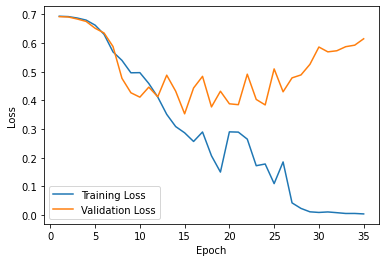

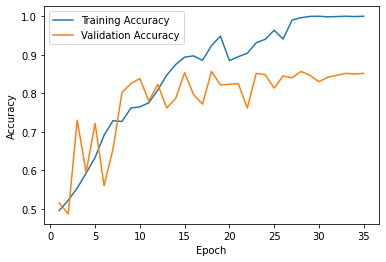

In [44]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate Performance on Test Set and Visualize Some Predictions

In [46]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

32/32 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.8560
Loss:  0.5584660768508911 Accuracy:  0.8560000061988831


In [50]:
# let's also visualize a confusion matrix once again
test_pred_prob = nn_model.predict(X_test_tfidf.toarray()) # get probability preidctions of positive sentiment (label = 1)
# convert to predictions
test_predictions = (test_pred_prob > 0.5).astype(int) # get predictions from proabilities with threshold of 0.5

cm_nn = confusion_matrix(y_test, test_predictions, labels=[0,1])

# positive = postive sentiment (labeled as 1)
# negative = negative sentiment (labeled as 0)
# columns will be predicted and rows will be actual

# create a df for visualization
cm_nn_df = pd.DataFrame(cm_nn, index=['Actual: Negative Sentiment', 'Actual: Positive Sentiment'],
                     columns=['Predicted: Negative Sentiment', 'Predicted: Positive Sentiment']
                    )

cm_nn_df

,Predicted: Negative Sentiment,Predicted: Positive Sentiment
Actual: Negative Sentiment,400,89
Actual: Positive Sentiment,55,456


In [51]:
# print auc score
auc_nn = roc_auc_score(y_test, test_pred_prob)
print('AUC on the test data: {:.4f}'.format(auc_nn))

AUC on the test data: 0.9306


The predictions are slightly different from the Logistic regression above with more false positives and less false negatives which is interesting. Their accuracies and AUC scores about the same as a result.

### Visualize Predictions with Sample of Reviews

In [53]:
import random

In [69]:
# examine some reviews and compare predicted sentiment (>= 0.5 threshold) to actual label
test_indices = np.arange(0, y_test.shape[0])
random_indices = np.random.choice(test_indices, size=15, replace=False) # get 15 random indices without replacement


for i in random_indices:
    print(f'Review #{i+1}\n')
    
    # retrieve original index of review (before train test split)
    orig_index = idx_test[i]
    
    # retrieve original review using this index (before preprocessing)
    orig_review = X.loc[orig_index]
    
    print(orig_review) # retrieve original review (before vectorization)

    goodReview = True if test_predictions[i] == 1 else False
    
    actual = True if y_test[i] == 1 else False # since y_test is encoded into 0s and 1s

    print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

    print('Actual: Is this a good review? {}\n'.format(actual))
    # print new line after
    print()

Review #445

While the soundtrack is a bit dated, this story is more relevant in the U.S. now more than ever. With not only blue collar jobs but everyone's jobs being outsourced by U.S. corporations while the government profits and American suffer.<br /><br />Peter Strauss is Emory, a steel worker who works the same job his father did for 35 years. His wife is well-portrayed by Pamela Reed, who is very realistic, trying to support the family with two children when Emory loses his job. The mill is closed under the pretext of mismanagement, but there is also embezzlement and cheaper wages where they can pay one steelworker in one month (outsourcing) what they would have to pay Strauss/Emory in a day. Never mind that these men are all good loyal workers who have values and try the best for their family.<br /><br />John Goodman, Gary Cole (as Strauss' brother) and a few other co-workers are also affected. It is very disturbing and realistic. Some scenes between Emory and his father are mov

We can see out of this small sample, the model does pretty well, however we can also see that with review #383, the language is very interesting and as a result, the model get's its prediction wrong.